In [7]:
from scipy.optimize import linprog, minimize
import pandas as pd
import numpy as np
from math import *
import mpmath as mp


global coordinate_x, coordinate_y, I, X0Y0Z0
#设置计算精度
mp.dps = 20
I_path = 'astmg173.xls'
d65_path = 'CIE_std_illum_D65.xlsx'
cmf_path = 'colorMatchFcn.xlsx'
data = pd.read_excel(I_path, sheet_name='Sheet1')

# 找360nm波长对应的索引，将此索引与对应的值作为起始
wvlngth_idx = int(data.loc[data['wavelength/nm'] == 359.5].index.values) + 1
I = np.array(data['I'][wvlngth_idx:])
I[0] = 0.5 * I[0]
I[I.shape[0] - 1] = 0.5 * I[I.shape[0] - 1]

d65 = pd.read_excel(d65_path)
cmf = pd.read_excel(cmf_path)
denominator = 0
cmf.drop('wavelength', axis=1, inplace=True)
cmf_matrix = cmf.to_numpy()

'''
梯形法求出光源光谱I与颜色匹配函数的y的积分结果
for i in range(cmf.shape[0] - 1):
     d65_tmp1 = d65['value'][i]
     d65_tmp2 = d65['value'][i + 1]
     cmf_tmp1 = cmf['y'][i]
     cmf_tmp2 = cmf['y'][i + 1]
     denominator += (d65_tmp1 * cmf_tmp1 + d65_tmp2 * cmf_tmp2) / 2
'''

'''
不用梯形法，对I，即光源头尾元素乘以0.5，再用行向量乘以列向量，即两个向量的元素对应相乘再相加
求出XYZ三色刺激值的系数，100/(I与y的积分)，y为颜色匹配函数中的一支
'''

'\n不用梯形法，对I，即光源头尾元素乘以0.5，再用行向量乘以列向量，即两个向量的元素对应相乘再相加\n求出XYZ三色刺激值的系数，100/(I与y的积分)，y为颜色匹配函数中的一支\n'

In [3]:
I = I.transpose()

In [4]:
I.shape

(401,)

In [5]:
cmf_matrix.shape

(401, 3)

In [6]:
cmf_matrix[:,1].shape

(401,)

In [7]:
np.dot(I,cmf_matrix[:,1])

160.3138422982072

In [8]:
result=0
for i in range(cmf.shape[0]):
    tmp=cmf_matrix[:,1][i]*I[i]
    result += tmp
print(result)

160.31384229820733


In [29]:
r0 = 0.5*np.ones(401)

In [10]:
Coefficient = 100/np.dot(I, cmf['y'].to_numpy())

In [11]:
X0 = np.multiply(I, cmf['x'].to_numpy())* Coefficient
Y0 = np.multiply(I, cmf['y'].to_numpy())* Coefficient
Z0 = np.multiply(I, cmf['z'].to_numpy())* Coefficient
X1 = np.ones(401)
Y1 = np.ones(401)
Z1 = np.ones(401)
for i in range(401):
    X1[i] = (I[i] * cmf['x'][i]) * Coefficient
    Y1[i] = (I[i] * cmf['y'][i]) * Coefficient
    Z1[i] = (I[i] * cmf['z'][i]) * Coefficient

array([0.50031385, 0.50036742, 0.50042946, 0.50050116, 0.50058389,
       0.5006792 , 0.50078881, 0.50091463, 0.50105883, 0.5012238 ,
       0.50141222, 0.50162704, 0.50187154, 0.50214935, 0.50246444,
       0.5028212 , 0.50322445, 0.50367945, 0.50419194, 0.50476818,
       0.50541495, 0.50613963, 0.50695015, 0.50785511, 0.5088637 ,
       0.5099858 , 0.51123197, 0.51261345, 0.51414221, 0.5158309 ,
       0.51769291, 0.51974231, 0.52199387, 0.52446305, 0.52716594,
       0.53011923, 0.5333402 , 0.53684662, 0.54065671, 0.54478906,
       0.54926254, 0.5540962 , 0.55930917, 0.56492053, 0.57094919,
       0.57741371, 0.58433221, 0.59172215, 0.59960018, 0.60798193,
       0.61688189, 0.62631312, 0.63628713, 0.64681363, 0.65790032,
       0.66955272, 0.68177396, 0.69456454, 0.70792219, 0.72184167,
       0.73631459, 0.75132927, 0.76687061, 0.78291993, 0.79945493,
       0.81644958, 0.83387408, 0.85169486, 0.86987456, 0.88837211,
       0.90714278, 0.92613829, 0.945307  , 0.96459401, 0.98394

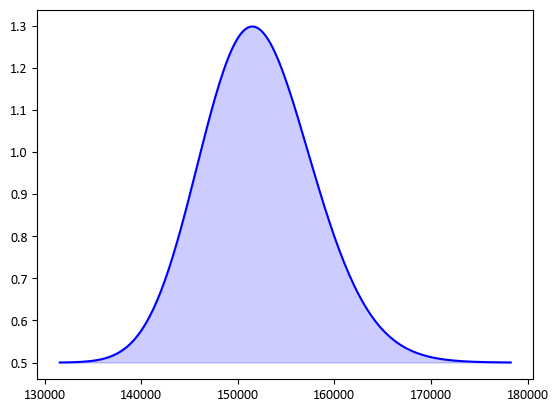

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams['font.sans-serif'] = ['Calibri']
x_absorption = np.linspace(360, 760, 201)
y_absorption = -30*norm.pdf(x_absorption, 460, 30)+0.5
# plt.plot(x_absorption, y_absorption, c="r")
# plt.fill_between(x_absorption, y_absorption,y_absorption[0], color='red', alpha=0.2)
x_emission = np.linspace(561,760,200)
y_emission = 50*norm.pdf(x_emission, 660, 25)+0.5
x_emission = 1e8/x_emission
sigma =25
miu = 660
# 高斯函数波长与波数做变换，要相应的把均值和标准差也做变换，都改成倒数再乘以10^8（这样是从nm转换到cm^-1）
# y_emission =25*(1/((1e8/sigma)*sqrt(2*pi)))*np.exp(-((1e8/x_emission)-(1e8/miu))**2/(2*(1e8/sigma)**2))
plt.plot(x_emission, y_emission, c="b")
plt.fill_between(x_emission, y_emission,y_emission[0], color='b', alpha=0.2)
# x = np.hstack((x_absorption,x_emission))
# y = np.hstack((y_absorption,y_emission))
# # plt.xlim([360, 760])
# # plt.ylim([0, 1])
# plt.xlabel('Wavelength/nm',fontsize=14)
# # plt.xticks(range(360, 761, 40))
# plt.ylabel('Reflectance',fontsize=14)
# # plt.title('Absorption and Emission')
# plt.tight_layout()
# # plt.savefig('my_plot.pdf',format="pdf")
# plt.savefig('my_plot.png')
# plt.show()
y_emission

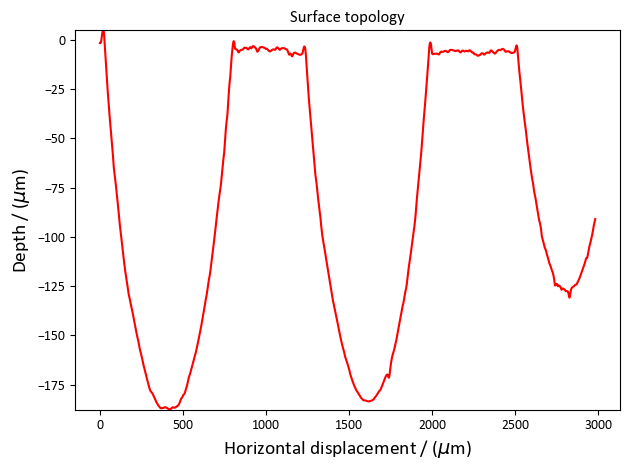

In [97]:
data=pd.read_excel('sphere Contact test.xlsx')
x= np.array(data.iloc[:,0])
y = (np.array(data.iloc[:,1]))/10000
plt.plot(x, y, c="r")
plt.ylim([np.min(y), np.max(y)])
plt.xlabel(r'Horizontal displacement / ($\mu$m)',fontsize=14)
plt.ylabel('Depth / ($\mu$m)',fontsize=14)
plt.title('Surface topology')
plt.tight_layout()
plt.savefig('Surface topology.png')

In [101]:
data=pd.read_excel('Light extraction optimized result.xlsx', sheet_name='Sheet2')
R_tmp1 = np.array(data.iloc[:, 0])